,Conductivity (mS/cm),Time (sec)
0,14.530,0.0
1,14.290,10.0
2,13.940,20.0
3,13.570,30.0
4,13.160,40.0
5,12.750,50.0
6,12.410,60.0
7,12.060,70.0
8,11.750,80.0
9,11.470,90.0


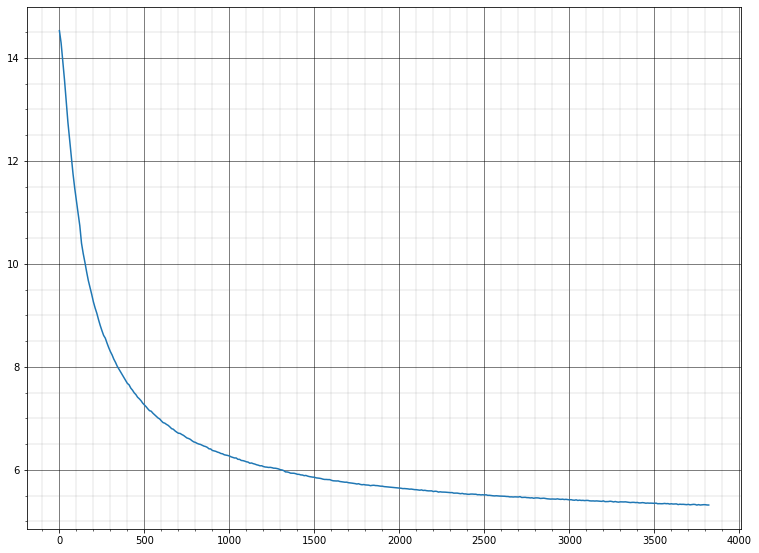

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Conductivity/25CSteady.csv")
data = data[0:len(data["Conductivity (mS/cm)"])-1]
for i in range(len(data["Conductivity (mS/cm)"])):
    data["Conductivity (mS/cm)"][i] = float(data["Conductivity (mS/cm)"][i])

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conductivity (mS/cm)"])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
data

In [25]:
import numpy as np
from scipy.optimize import fsolve
import os

isSteady = True
Linf = 4.692 #Fill in if False

newData = pd.DataFrame()
newData["Time (sec)"] = data["Time (sec)"]

C_Ea0 = 0.05 #mol/L
C_Eainf = 0 #mol/L
L0 = data["Conductivity (mS/cm)"][0]
if isSteady:
    Linf = np.amin(data["Conductivity (mS/cm)"])
newData["Conc Ea (mol/L)"] = np.zeros(len(data["Time (sec)"]))

def FindC_Ea(C_Ea,Lt):
    return ((L0 - Lt)/(Lt - Linf)) - ((C_Ea0 - C_Ea)/(C_Ea - C_Eainf))

reachedMin = False
for i in range(0,len(data["Time (sec)"])):
    if i > 0:
        guessValue = newData["Conc Ea (mol/L)"][i-1]
    else:
        guessValue = C_Ea0
    if data["Conductivity (mS/cm)"][i] != Linf and reachedMin == False:
        newData["Conc Ea (mol/L)"][i] = fsolve(FindC_Ea,guessValue,args=data["Conductivity (mS/cm)"][i])
    else:
        newData["Conc Ea (mol/L)"][i] = C_Eainf
        reachedMin = True
    
# newData["Temperature (degC)"] = np.ones(len(data["Time (sec)"]))*data["Temp degC"][0]

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
ensure_dir("Data Concentration/25CSteady.csv")
newData.to_csv("Data Concentration/25CSteady.csv", index=False, encoding='utf8')

newData

,Time (sec),Conc Ea (mol/L)
0,0.0,0.050000
1,10.0,0.048698
2,20.0,0.046799
3,30.0,0.044792
4,40.0,0.042567
5,50.0,0.040343
6,60.0,0.038498
7,70.0,0.036599
8,80.0,0.034918
9,90.0,0.033398
